# Intro

### Assignment Machine Learning

| Nama          | NIM |
|---------------|-----|
| Muhammad Iqbal Saputra | 2702390236 |
| Radit Arya Pradipta    | 2802446705 |
| Muhammad Reza Alghifari| 2802555044 |

Dataset diambil dari website Computer Sciences University of California Irvine [UC Irvine Machine Learning Repository]('https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients')

Objective dari dataset ini adalah untuk memprediksi apakah nasabah akan gagal membayar kartu kreditnya atau tidak. Data asli tsb berasalah dari sebuah bank besar di Taiwan yg mana dikumpulkan Yeh & Lien (2009) untuk diteliti

| Kolom                         | Deskripsi                                                                 |
|------------------------------|---------------------------------------------------------------------------|
| `ID`                         | ID unik untuk masing-masing klien (tidak berpengaruh dalam prediksi).     |
| `LIMIT_BAL`                  | Total jumlah kredit yang diberikan kepada klien (limit kartu kredit).     |
| `SEX`                        | Jenis kelamin (1 = laki-laki, 2 = perempuan).                             |
| `EDUCATION`                  | Tingkat pendidikan (1 = pascasarjana, 2 = sarjana, 3 = SMA, 4 = lainnya). |
| `MARRIAGE`                   | Status pernikahan (1 = menikah, 2 = lajang, 3 = lainnya).                |
| `AGE`                        | Usia klien (dalam tahun).                                                 |
| `PAY_0`                      | Status pembayaran bulan September 2005 (0 = tepat waktu, -1 = bayar penuh, 1 = menunggak 1 bulan, dst). |
| `PAY_2`                      | Status pembayaran bulan Agustus 2005 (sama seperti PAY_0).                |
| `PAY_3`                      | Status pembayaran bulan Juli 2005.                                        |
| `PAY_4`                      | Status pembayaran bulan Juni 2005.                                        |
| `PAY_5`                      | Status pembayaran bulan Mei 2005.                                         |
| `PAY_6`                      | Status pembayaran bulan April 2005.                                       |
| `BILL_AMT1`                  | Jumlah tagihan pada bulan September 2005.                                 |
| `BILL_AMT2`                  | Jumlah tagihan pada bulan Agustus 2005.                                   |
| `BILL_AMT3`                  | Jumlah tagihan pada bulan Juli 2005.                                      |
| `BILL_AMT4`                  | Jumlah tagihan pada bulan Juni 2005.                                      |
| `BILL_AMT5`                  | Jumlah tagihan pada bulan Mei 2005.                                       |
| `BILL_AMT6`                  | Jumlah tagihan pada bulan April 2005.                                     |
| `PAY_AMT1`                   | Jumlah pembayaran pada bulan September 2005.                              |
| `PAY_AMT2`                   | Jumlah pembayaran pada bulan Agustus 2005.                                |
| `PAY_AMT3`                   | Jumlah pembayaran pada bulan Juli 2005.                                   |
| `PAY_AMT4`                   | Jumlah pembayaran pada bulan Juni 2005.                                   |
| `PAY_AMT5`                   | Jumlah pembayaran pada bulan Mei 2005.                                    |
| `PAY_AMT6`                   | Jumlah pembayaran pada bulan April 2005.                                  |
| `default payment next month` | Target label: Apakah klien gagal bayar di bulan berikutnya? (1 = ya, 0 = tidak). |


# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import time
start_time = time.time()

# Data Loading

In [2]:
# Loading data
df = pd.read_excel('default_of_credit_card_clients.xlsx', header=1)
df.drop(columns=['ID'], inplace=True)

In [3]:
# Cek 5 data teratas
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Cek 5 data terbawah
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

- Terdapat total ```30000 entry(row) data dengan 24 kolom data```  

- hanya 1 tipe data yang digunakan yaitu integer   

- Tidak Terdapat ```null values dalam data```  

In [6]:
# Cek bentuk data
print(f'Bentuk data: {df.shape}')
df.columns.tolist()

Bentuk data: (30000, 24)


['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
# Cek missing value
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

*Data bersih dari missing value*

In [11]:
# Cek data duplikat
df.duplicated().sum()

35

*Terdapat 35 row data yang sama*

In [12]:
# Drop data duplikat
df.drop_duplicates(inplace=True)
print(f'Bentuk data setelah di drop: {df.shape}')

Bentuk data setelah di drop: (29965, 24)


# Exploratory Data Analysis

## 1. Statistic Descriptive

In [13]:
# Cek deskripsi data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29965.0,1.603738,0.489128,1.0,1.0,2.0,2.0,2.0
EDUCATION,29965.0,1.853629,0.790411,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29965.0,1.551877,0.521997,0.0,1.0,2.0,2.0,3.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
PAY_0,29965.0,-0.016753,1.123492,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29965.0,-0.131854,1.196322,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29965.0,-0.164392,1.195878,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29965.0,-0.218922,1.168175,-2.0,-1.0,0.0,0.0,8.0
PAY_5,29965.0,-0.264509,1.132220,-2.0,-1.0,0.0,0.0,8.0


📊 Descriptive Statistics Summary

1. Umum
- Jumlah data: **29.965 baris**
- Tidak ada missing values

---

1. Fitur Demografi

| Kolom       | Mean / Median | Insight                                                                 |
|-------------|----------------|-------------------------------------------------------------------------|
| `SEX`       | Mean = 1.60    | Mayoritas klien adalah **perempuan** (kode 2)                           |
| `EDUCATION` | Mean = 1.85    | Mayoritas klien adalah **lulusan sarjana/SMA**                          |
| `MARRIAGE`  | Mean = 1.55    | Mayoritas klien **menikah atau lajang**                                 |
| `AGE`       | Mean = 35.49   | Usia klien berkisar antara **21–79 tahun**, median = 34                 |

---

3. Fitur Finansial

| Kolom         | Mean          | Std Dev        | Max         | Insight                                                                 |
|---------------|---------------|----------------|-------------|-------------------------------------------------------------------------|
| `LIMIT_BAL`   | 167.442.000   | 129.760.135    | 1.000.000   | Limit kartu kredit sangat bervariasi, banyak outlier                    |
| `BILL_AMT1-6` | ~38–51 juta   | 59–73 juta     | Hingga 1.66M| Ada klien dengan tagihan sangat tinggi (indikasi high spenders/outlier) |
| `PAY_AMT1-6`  | ~4.800–5.900  | 15–23 juta     | Hingga 1.68M| Nilai pembayaran juga menunjukkan ketimpangan besar                     |

---

4. Histori Pembayaran (PAY_0 to PAY_6)

| Kolom  | Min | Median | Max | Insight                                                                 |
|--------|-----|--------|-----|-------------------------------------------------------------------------|
| `PAY_X`| -2  | -1     | 8   | Nilai -1 artinya pembayaran tepat waktu, nilai 0 artinya minimum paid, >0 = tunggakan. Nilai ekstrem (8) menandakan keterlambatan parah |

---

5. Target: `default payment next month`
- Mean = **0.221**
- Artinya: hanya **22,1%** dari klien yang gagal bayar (label = 1)
- Dataset **imbalanced** → perlu strategi seperti resampling saat modeling

---

1. Outlier Detection
- Kolom `LIMIT_BAL`, `BILL_AMTx`, `PAY_AMTx` menunjukkan nilai maksimum yang jauh dari Q3 dan deviasi standar besar
- Potensi **outlier ekstrim** sangat tinggi dan **perlu dihandle** saat preprocessing

---

🧠 Kesimpulan
- Dataset bersih dan lengkap (tanpa missing value)
- Distribusi data **cukup skewed dan mengandung banyak outlier**
- Target klasifikasi **imbalanced**
- Diperlukan langkah preprocessing ekstra seperti normalisasi, outlier removal, dan handling imbalance sebelum membuat model



## 2. Data Skewness and Kurtosis

In [21]:
# Cek skewness & kurtosis data
skewness = df.skew()
kurtosis = df.kurtosis()
stats_df = pd.DataFrame({'skewness': skewness, 'kurtosis': kurtosis})
stats_df

,skewness,kurtosis
LIMIT_BAL,0.993491,0.537587
SEX,-0.424202,-1.820174
EDUCATION,0.970709,2.079207
MARRIAGE,-0.018591,-1.362806
AGE,0.732056,0.043988
PAY_0,0.734606,2.730038
PAY_2,0.792070,1.577609
PAY_3,0.841464,2.091666
PAY_4,1.000799,3.508962
PAY_5,1.009329,4.003562


📊 Summary Skewness dan Kurtosis

✨ Penjelasan Singkat
- **Skewness** mengukur kemiringan distribusi data.
  - Skewness > 0 → data condong ke kanan (right-skewed)
  - Skewness < 0 → data condong ke kiri (left-skewed)
- **Kurtosis** mengukur ketajaman puncak distribusi.
  - Normal kurtosis ≈ 3
  - Kurtosis > 3 → distribusi tajam, banyak outlier (leptokurtic)
  - Kurtosis < 3 → distribusi datar (platykurtic)

---

📈 Kolom dengan Skewness Tinggi (Right-Skewed)
Kolom berikut memiliki skewness **jauh di atas 1**, artinya data sangat condong ke kanan dan outlier besar kemungkinan terjadi:

| Kolom        | Skewness | Insight                                                              |
|--------------|----------|----------------------------------------------------------------------|
| PAY_AMT2     | 30.44    | Distribusi pembayaran bulan kedua sangat tidak normal               |
| PAY_AMT3     | 17.21    | Ada beberapa nilai ekstrim tinggi                                   |
| PAY_AMT1     | 14.66    | Mayoritas bayar kecil, sedikit yang bayar besar                     |
| PAY_AMT4-6   | 10–13    | Pola serupa, outlier kuat                                            |
| BILL_AMT1-6  | 2.6–3.1  | Tagihan bulanan sangat bervariasi dan skewed ke kanan               |
| PAY_4-6      | ≈1.0     | Ada keterlambatan ekstrim dari sebagian kecil klien                 |
| LIMIT_BAL    | 0.99     | Sebagian kecil klien punya limit sangat tinggi                      |

---

📊 Kolom dengan Kurtosis Tinggi (Tajam & Outlier Besar)
Kolom berikut memiliki kurtosis jauh lebih tinggi dari 3, artinya sangat tajam dan mengandung outlier ekstrem:

| Kolom        | Kurtosis | Insight                                                              |
|--------------|----------|----------------------------------------------------------------------|
| PAY_AMT2     | 1639.92  | Outlier sangat ekstrim                                               |
| PAY_AMT3     | 563.74   | Banyak nilai ekstrim di distribusi                                  |
| PAY_AMT1     | 414.85   | Sebagian kecil klien bayar sangat besar                             |
| PAY_AMT4-6   | 166–277  | Masih sangat tajam dan tidak normal                                  |
| BILL_AMT3    | 19.77    | Ada tagihan sangat besar yang mendistorsi distribusi                |
| BILL_AMT1-6  | 9.8–12.2 | Semua tagihan bulanan menunjukkan outlier                           |
| PAY_4-6      | 3.4–4.0  | Pembayaran tertunda ekstrim                                          |

---

⚖️ Kolom yang Hampir Simetris & Normal
| Kolom        | Skewness | Kurtosis | Insight                                      |
|--------------|----------|----------|----------------------------------------------|
| AGE          | 0.73     | ≈0.04    | Hampir normal, sedikit skew ke kanan         |
| EDUCATION    | 0.97     | 2.08     | Agak skewed tapi masih bisa ditoleransi      |
| default_payment | 1.34  | ≈ -0.20  | Target label agak skewed, tapi kurtosis rendah|

---

🔍 Catatan Penting
- **PAY_AMT** & **BILL_AMT** kolom sangat skewed dan leptokurtic → **perlu transformasi** (contoh: log transform) sebelum modeling.
- Data **tidak normal**, jadi algoritma yang mengasumsikan normalitas (seperti Linear Regression) mungkin kurang cocok tanpa preprocessing.
- Perlu juga pertimbangkan **robust scaler** daripada standar scaler.

---

Kesimpulan
- Kita akan menggunakan `log1p()` atau `MinMaxScaler` untuk fitur dengan skewness > 1
- Visualisasi distribusi (histogram/boxplot) untuk melihat bentuk dan outlier
- Pertimbangkan teknik sampling karena target `default_payment` juga skewed



## Distribustion Visualization

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

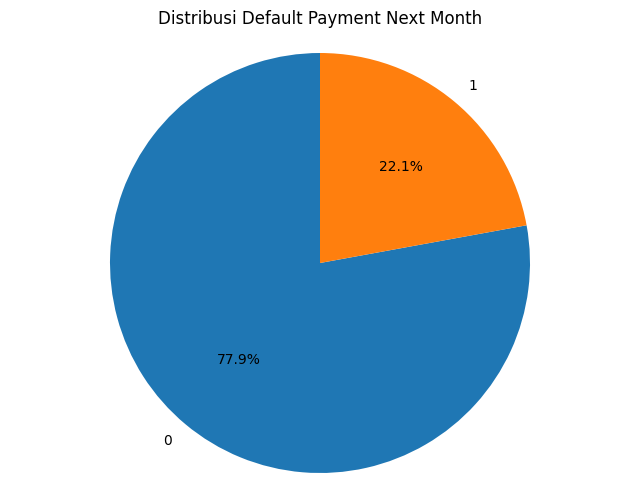

In [31]:
# Cek distribusi data
counts = df['default payment next month'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Default Payment Next Month')
plt.axis('equal')
plt.show()

Fitur target imbalance
`1 = gagal bayar`
`0 = bayar`
Perlu dilakukan resampling agar data tidak bias ketika predict

# Pre-processing

# Feature Engineering

# Model Training and Evaluation

In [ ]:
end_time = time.time()
print(f"Total waktu eksekusi semua cell: {end_time - start_time:.2f} detik")